In [72]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker


# Construct the relative file path
file_path = os.path.join('..', '..', 'Output', 'Simulation', 'quadcopterFeasability.csv')
olddata = pd.read_csv(file_path)
# Construct the relative file path
filePath = os.path.join('..', '..', 'Output', 'Simulation', 'sumSimQC.csv')
data = pd.read_csv(filePath)
data = data.dropna()  # Add this line to remove rows with NaN values

# Construct the relative file path
filePath = os.path.join('..', '..', 'Output', 'Simulation', 'designsQC-comparsiondf.csv')
coverData = pd.read_csv(filePath)


# Define a mapping from unique entries to values
mapping = {
    65: 1,
    '65': 1,
    10: 2,
    '10': 2,
    0: 3,
    '0': 3,
    200: 4,
    '200': 4,
    'gimbal': 5
}

# Assign categorical values based on the mapping
data['Overlap_cat'] = data['Overlap'].map(mapping)



View data

In [15]:
print(data)

     subplots  Mean_estimated_Density  mean_N  trueDensity  \
0        16.0                 179.777     8.0      125.000   
1        16.0                 314.393    17.0      265.625   
2        16.0                 374.818    21.0      328.125   
3        16.0                 438.617    25.0      390.625   
4        16.0                  85.150     3.0       46.875   
..        ...                     ...     ...          ...   
195       9.0                 609.269    17.0      555.556   
196       9.0                 721.357    20.0      666.667   
197       9.0                 736.375    20.0      666.667   
198       9.0                 848.814    24.0      805.556   
199       9.0                1087.130    32.0     1055.556   

     Mean_relative_Estimate  Percent_Bias  RRMSE  CI_Coverage_Prob  Mean_SE  \
0                     1.438        43.822  1.255             0.987    4.258   
1                     1.184        18.360  0.363             0.994    1.118   
2                 

In [16]:
print(data.sort_values('CV'))

     subplots  Mean_estimated_Density  mean_N  trueDensity  \
139      25.0                 898.457   254.0      900.000   
138      25.0                 798.779   226.0      800.000   
137      25.0                 700.157   198.0      700.000   
128      16.0                 938.860   170.0      937.500   
129      16.0                 985.476   178.0      984.375   
..        ...                     ...     ...          ...   
190       9.0                 241.115     4.0      138.889   
60        4.0                 259.735     2.0      125.000   
20        4.0                 349.750     3.0      187.500   
164      16.0                  92.971     3.0       46.875   
180       4.0                 346.133     2.0      125.000   

     Mean_relative_Estimate  Percent_Bias  RRMSE  CI_Coverage_Prob   Mean_SE  \
139                   0.998        -0.171  0.015             1.000     0.069   
138                   0.998        -0.153  0.016             1.000     0.074   
137            

/tmp/ipykernel_2889/3269256357.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
/tmp/ipykernel_2889/3269256357.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
/tmp/ipykernel_2889/3269256357.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
/tmp/ipykernel_2889/3269256357.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
/tmp/ipy

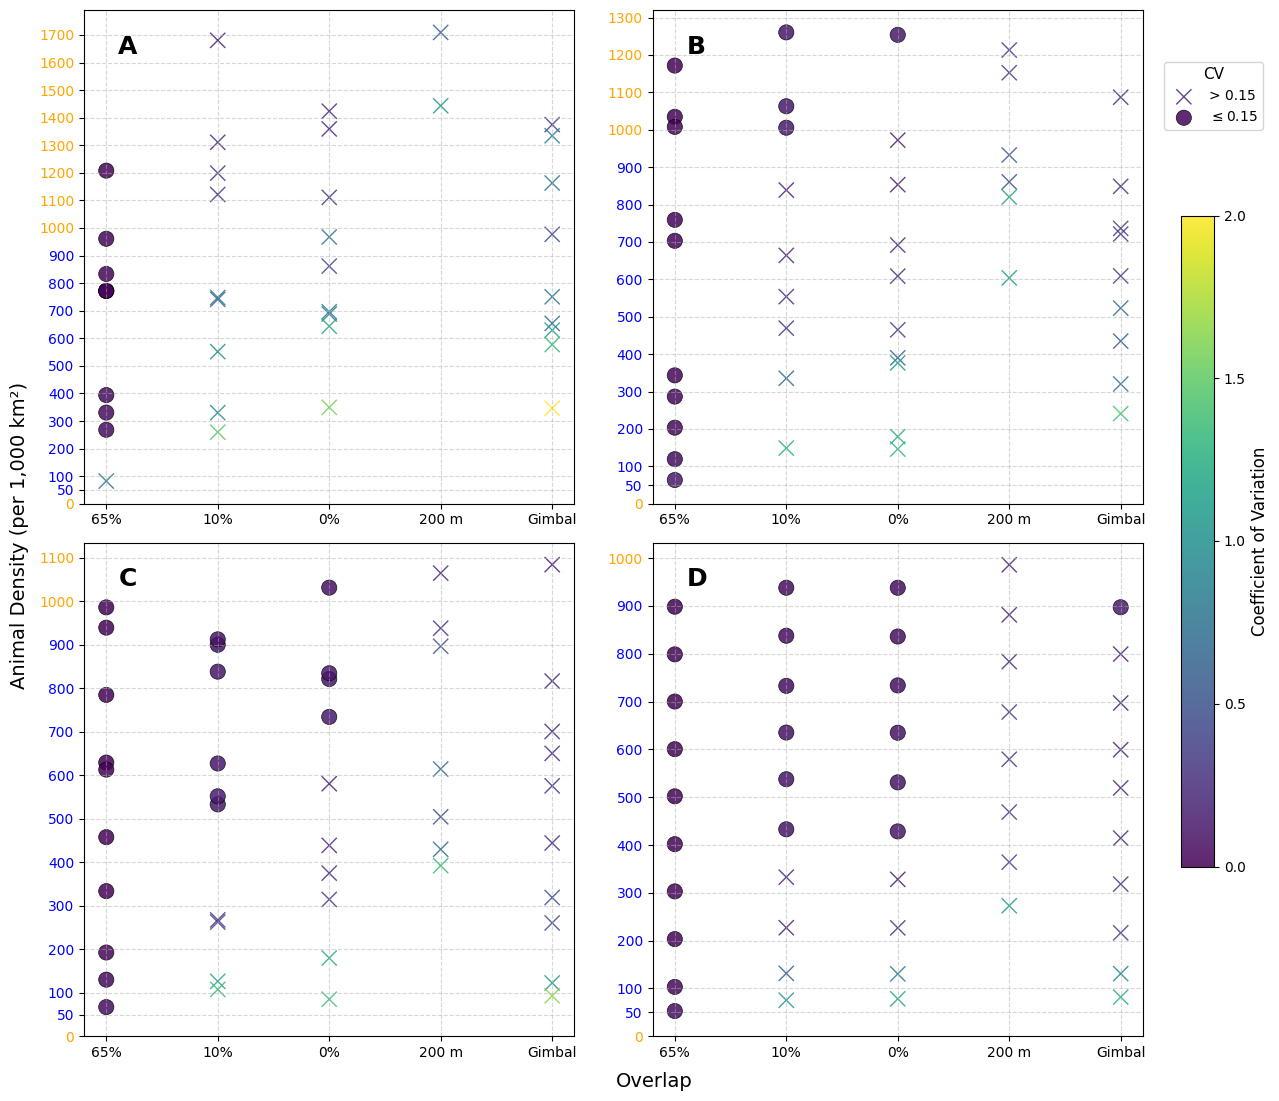

In [67]:
sorted_data = data.sort_values(by='NSubplots')
unique_nsubplots = sorted_data['NSubplots'].unique()[:4]  # Use first 4 for 2x2 layout

label_mapping = {
    1: '65%',
    2: '10%',
    3: '0%',
    4: '200 m',
    5: 'Gimbal'
}

fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

cmap = plt.get_cmap('viridis')
# norm = mpl.colors.LogNorm(vmin=sorted_data['CV'].min()+1e-6, vmax=sorted_data['CV'].max())
norm = mpl.colors.Normalize(
    vmin=0,  # Start from 0
    vmax=round(sorted_data['CV'].max(),0)  # Use absolute maximum
    # vmax=175
)

subplot_labels = ['A', 'B', 'C', 'D']
blue_ticks = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900]

for i, nsub in enumerate(unique_nsubplots):
    ax = axs[i]
    subset = sorted_data[sorted_data['NSubplots'] == nsub]
    subset = subset.sort_values('CV')

    mask_x = subset['CV'] > 0.15
    mask_circle = subset['CV'] <= 0.15

    sc_x = ax.scatter(
        subset.loc[mask_x, 'Overlap_cat'],
        subset.loc[mask_x, 'Mean_estimated_Density'],
        c=subset.loc[mask_x, 'CV'],
        cmap=cmap,
        norm=norm,
        marker='x',
        s=120,
        alpha=0.85,
        edgecolor='k',
        linewidth=1.0,
        label='> 0.15'
    )
    sc_circle = ax.scatter(
        subset.loc[mask_circle, 'Overlap_cat'],
        subset.loc[mask_circle, 'Mean_estimated_Density'],
        c=subset.loc[mask_circle, 'CV'],
        cmap=cmap,
        norm=norm,
        marker='o',
        s=120,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5,
        label=r'$\leq 0.15$'
    )

    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='both', which='major', labelsize=10)

    unique_overlap_cats = subset['Overlap_cat'].unique()
    ax.set_xticks(unique_overlap_cats)
    ax.set_xticklabels([label_mapping[cat] for cat in unique_overlap_cats])

    # Ensure all blue ticks are visible
    y_min, y_max = ax.get_ylim()
    all_ticks = sorted(set(blue_ticks + list(range(int(0), int(y_max)+1, 100))))
    ax.set_yticks(all_ticks)

    # Color y-axis tick labels
    for tick in ax.get_yticklabels():
        try:
            tick_value = int(tick.get_text())
            tick.set_color('blue' if tick_value in blue_ticks else 'orange')
        except ValueError:
            tick.set_color('orange')

    # Add subplot label (A, B, C, D)
    ax.text(0.07, 0.95, subplot_labels[i], transform=ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left')

# Shared axis labels
fig.text(0.5, 0.04, 'Overlap', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Animal Density (per 1,000 km²)', va='center', rotation='vertical', fontsize=14)

# Shared colorbar
max_val = round(sorted_data['CV'].max(),0)
cbar_ticks = np.linspace(0, max_val, 5)  # Create 6 evenly spaced ticks from 0 to max
# cbar_ticks = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2]
cbar = fig.colorbar(sc_circle, ax=axs, orientation='vertical', pad=0.1, fraction=0.03, ticks=cbar_ticks)
cbar.set_label('Coefficient of Variation', fontsize=12)
cbar.ax.tick_params(labelsize=10)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
cbar.ax.yaxis.set_minor_formatter(ticker.NullFormatter())

# Legend
fig.legend(['> 0.15', r'$\leq 0.15$'], title='CV',
           loc='upper right', bbox_to_anchor=(0.94, 0.9),
           fontsize=10, title_fontsize=11)

plt.tight_layout(rect=[0.05, 0.05, 0.86, 0.95])
plt.savefig(os.path.join('..', '..', 'Output', 'Plots', 'quadcopterFeasability_plot_2D_CV_combined.png'), dpi=300)
plt.show()


/tmp/ipykernel_32712/3605544155.py:40: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
/tmp/ipykernel_32712/3605544155.py:40: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
/tmp/ipykernel_32712/3605544155.py:40: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
/tmp/ipykernel_32712/3605544155.py:40: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_x = ax.scatter(
/tmp

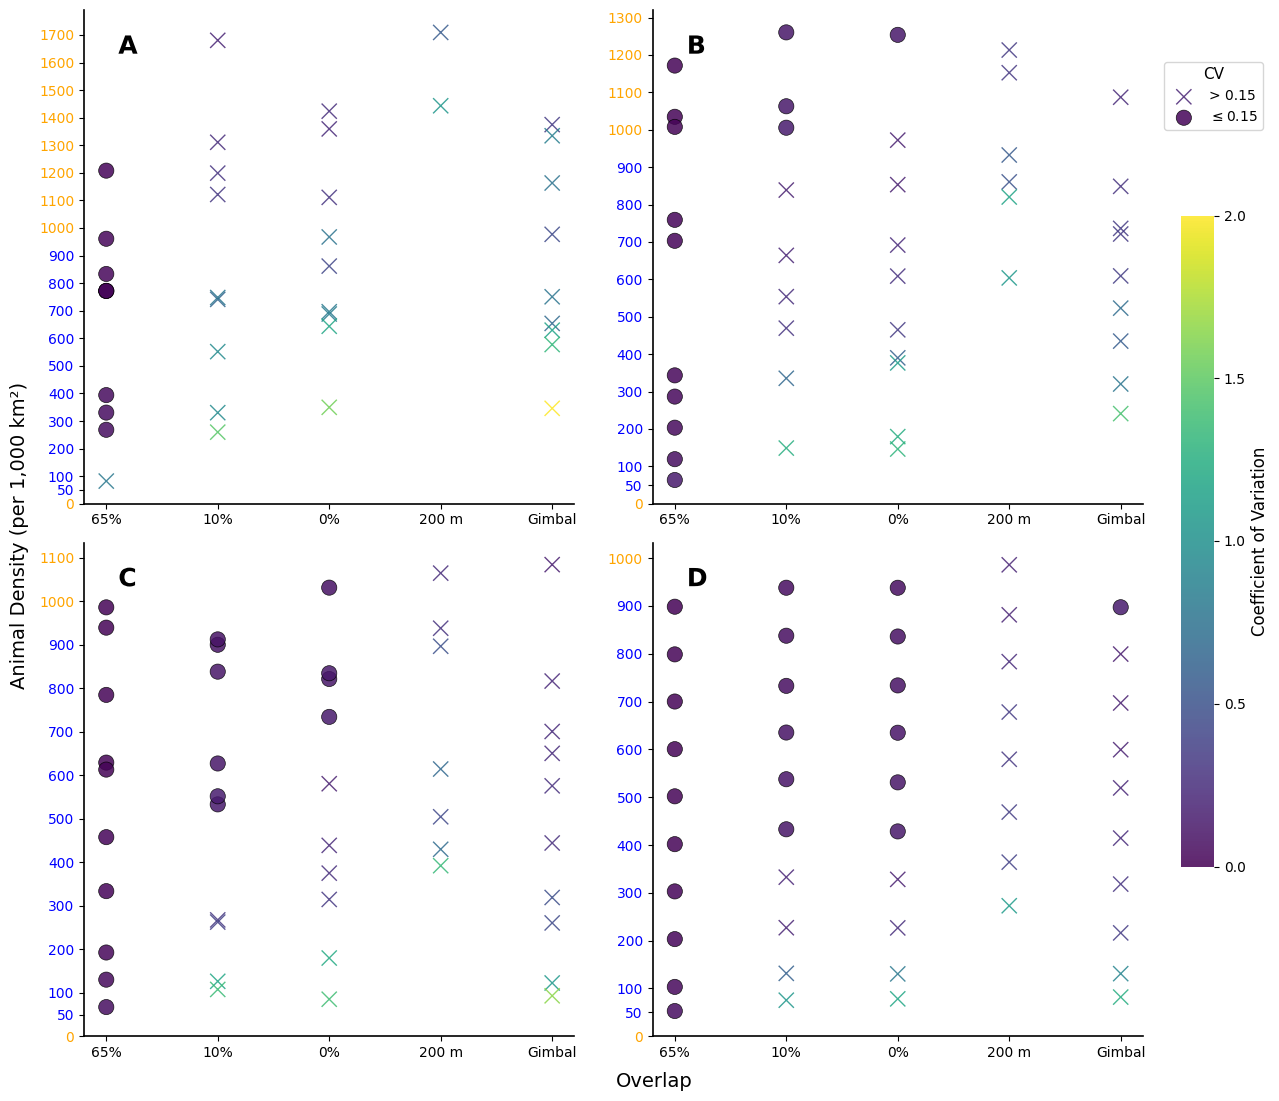

In [100]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import numpy as np
import os
import matplotlib.ticker as ticker

# Sort and extract unique subplot categories
sorted_data = data.sort_values(by='NSubplots')
unique_nsubplots = sorted_data['NSubplots'].unique()[:4]  # Use first 4 for 2x2 layout

label_mapping = {
    1: '65%',
    2: '10%',
    3: '0%',
    4: '200 m',
    5: 'Gimbal'
}

fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

cmap = plt.get_cmap('viridis')
norm = mpl.colors.Normalize(
    vmin=0,  # Start from 0
    vmax=round(sorted_data['CV'].max(), 0)  # Use absolute maximum
)

subplot_labels = ['A', 'B', 'C', 'D']
blue_ticks = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900]

for i, nsub in enumerate(unique_nsubplots):
    ax = axs[i]
    subset = sorted_data[sorted_data['NSubplots'] == nsub]
    subset = subset.sort_values('CV')

    mask_x = subset['CV'] > 0.15
    mask_circle = subset['CV'] <= 0.15

    sc_x = ax.scatter(
        subset.loc[mask_x, 'Overlap_cat'],
        subset.loc[mask_x, 'Mean_estimated_Density'],
        c=subset.loc[mask_x, 'CV'],
        cmap=cmap,
        norm=norm,
        marker='x',
        s=120,
        alpha=0.85,
        edgecolor='k',
        linewidth=1.0,
        label='> 0.15'
    )
    sc_circle = ax.scatter(
        subset.loc[mask_circle, 'Overlap_cat'],
        subset.loc[mask_circle, 'Mean_estimated_Density'],
        c=subset.loc[mask_circle, 'CV'],
        cmap=cmap,
        norm=norm,
        marker='o',
        s=120,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5,
        label=r'$\leq 0.15$'
    )

    # Remove grid for cleaner look
    ax.grid(False)

    ax.tick_params(axis='both', which='major', labelsize=10)

    unique_overlap_cats = subset['Overlap_cat'].unique()
    ax.set_xticks(unique_overlap_cats)
    ax.set_xticklabels([label_mapping[cat] for cat in unique_overlap_cats])

    # Ensure all blue ticks are visible
    y_min, y_max = ax.get_ylim()
    all_ticks = sorted(set(blue_ticks + list(range(int(0), int(y_max)+1, 100))))
    ax.set_yticks(all_ticks)

    # Color y-axis tick labels
    for tick in ax.get_yticklabels():
        try:
            tick_value = int(tick.get_text())
            tick.set_color('blue' if tick_value in blue_ticks else 'orange')
        except ValueError:
            tick.set_color('orange')

    # Add subplot label with shadow effect
    label = ax.text(0.07, 0.95, subplot_labels[i], transform=ax.transAxes,
                    fontsize=18, fontweight='bold', va='top', ha='left')
    label.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white'),
                             path_effects.Normal()])




# Apply consistent axis styling for all subplots
for ax in axs:
    # Hide top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Style left and bottom spines
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)




# Shared axis labels
fig.text(0.5, 0.04, 'Overlap', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Animal Density (per 1,000 km²)', va='center', rotation='vertical', fontsize=14)

# Shared colorbar
max_val = round(sorted_data['CV'].max(), 0)
cbar_ticks = np.linspace(0, max_val, 5)
cbar = fig.colorbar(sc_circle, ax=axs, orientation='vertical', pad=0.1, fraction=0.03, ticks=cbar_ticks)
cbar.set_label('Coefficient of Variation', fontsize=12)
cbar.ax.tick_params(labelsize=10)
cbar.ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
cbar.ax.yaxis.set_minor_formatter(ticker.NullFormatter())
cbar.outline.set_linewidth(0)  # Remove colorbar border for rounded look

# Legend
fig.legend(['> 0.15', r'$\leq 0.15$'], title='CV',
           loc='upper right', bbox_to_anchor=(0.94, 0.9),
           fontsize=10, title_fontsize=11)


plt.tight_layout(rect=[0.05, 0.05, 0.86, 0.95])
plt.savefig(os.path.join('..', '..', 'Output', 'Plots', 'quadcopterFeasability_plot_2D_CV_combined.png'), dpi=300)
plt.show()

In [18]:
round(sorted_data['Percent_Bias'].max(),-1)

np.float64(180.0)

/tmp/ipykernel_32712/4124647424.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 0.86, 0.95])


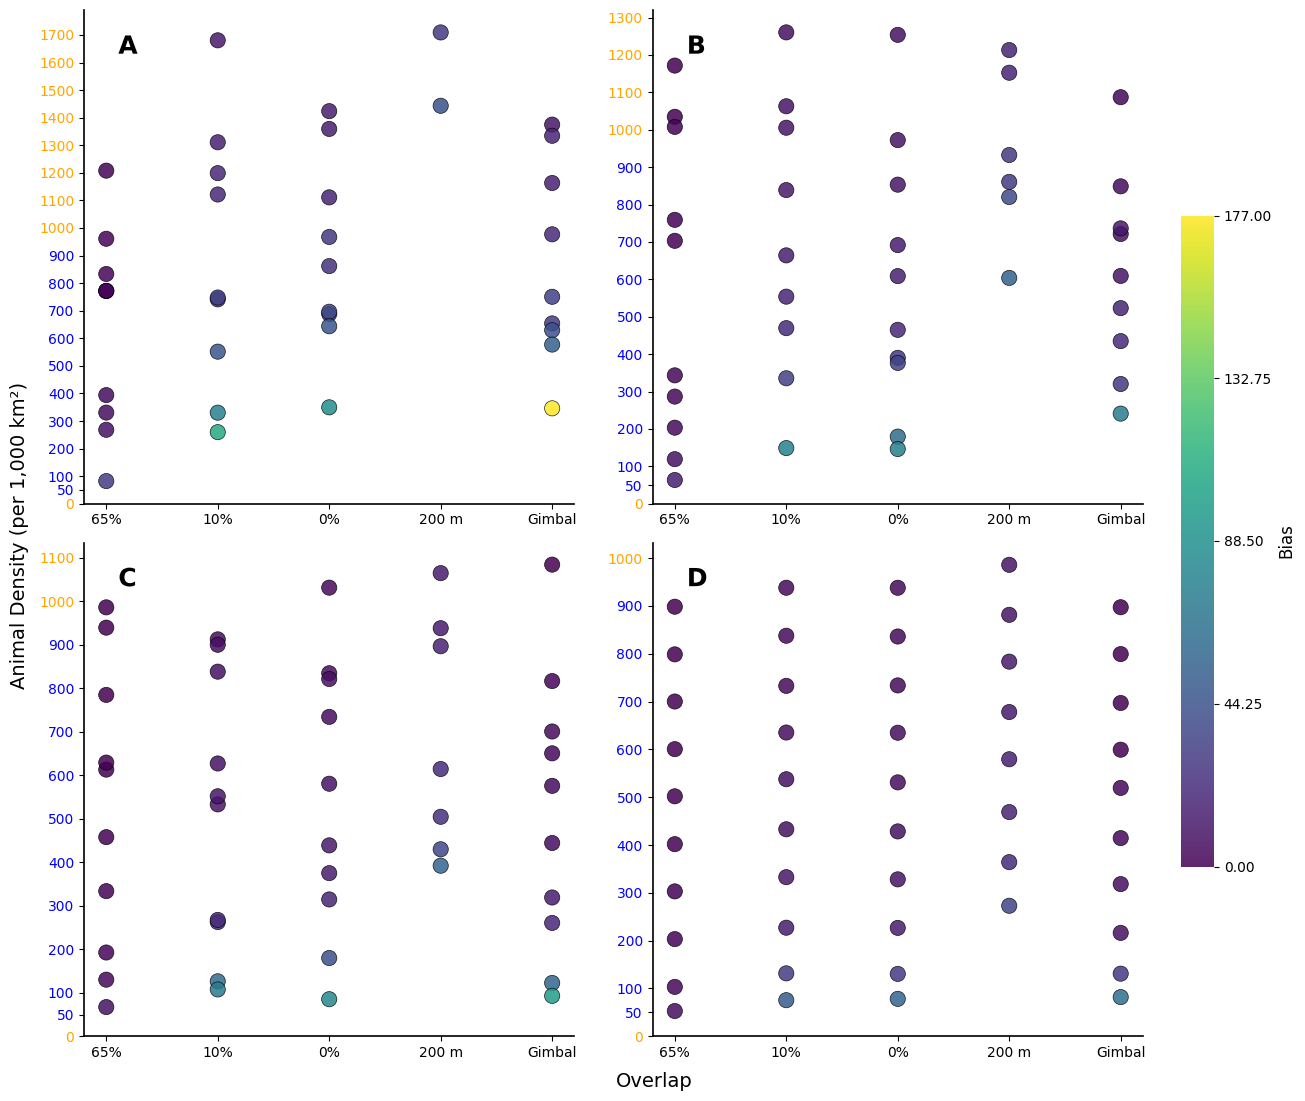

In [102]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import numpy as np
import os

# Sort and extract unique subplot categories
sorted_data = data.sort_values(by='NSubplots')
unique_nsubplots = sorted_data['NSubplots'].unique()[:4]  # First 4 for 2x2 layout

# Label mapping for x-axis
label_mapping = {
    1: '65%',
    2: '10%',
    3: '0%',
    4: '200 m',
    5: 'Gimbal'
}

# Setup figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

# Colormap and color normalization
cmap = plt.get_cmap('viridis')
norm = mpl.colors.Normalize(
    vmin=0,  # Start from 0
    vmax=round(sorted_data['Percent_Bias'].max(), 0)
)

subplot_labels = ['A', 'B', 'C', 'D']
blue_ticks = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900]

for i, nsub in enumerate(unique_nsubplots):
    ax = axs[i]
    subset = sorted_data[sorted_data['NSubplots'] == nsub]
    subset = subset.sort_values('Percent_Bias')

    sc = ax.scatter(
        subset['Overlap_cat'],
        subset['Mean_estimated_Density'],
        c=subset['Percent_Bias'],
        cmap=cmap,
        norm=norm,
        marker='o',
        s=120,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5
    )

    # Remove grid for cleaner look
    ax.grid(False)

    ax.tick_params(axis='both', which='major', labelsize=10)

    unique_overlap_cats = subset['Overlap_cat'].unique()
    ax.set_xticks(unique_overlap_cats)
    ax.set_xticklabels([label_mapping[cat] for cat in unique_overlap_cats])

    # Adjust y-axis ticks
    y_min, y_max = ax.get_ylim()
    all_ticks = sorted(set(blue_ticks + list(range(0, int(y_max) + 1, 100))))
    ax.set_yticks(all_ticks)

    # Color y-axis tick labels
    for tick in ax.get_yticklabels():
        try:
            tick_value = int(tick.get_text())
            tick.set_color('blue' if tick_value in blue_ticks else 'orange')
        except ValueError:
            tick.set_color('orange')

    # Add subplot label with shadow effect
    label = ax.text(0.07, 0.95, subplot_labels[i], transform=ax.transAxes,
                    fontsize=18, fontweight='bold', va='top', ha='left')
    label.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white'),
                             path_effects.Normal()])

    
# Apply consistent axis styling for all subplots
for ax in axs:
    # Hide top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Style left and bottom spines
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)


# Shared axis labels
fig.text(0.5, 0.04, 'Overlap', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Animal Density (per 1,000 km²)', va='center', rotation='vertical', fontsize=14)

# Define specific ticks for the colorbar
max_val = round(sorted_data['Percent_Bias'].max(), 0)
cbar_ticks = np.linspace(0, max_val, 5)

# Shared colorbar for RRMSE
cbar = fig.colorbar(sc, ax=axs, orientation='vertical', pad=0.1, fraction=0.03, ticks=cbar_ticks)
cbar.set_label('Bias', fontsize=12)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_yticklabels([f'{x:.2f}' for x in cbar_ticks])
cbar.outline.set_linewidth(0)  # Remove colorbar border for rounded look


plt.tight_layout(rect=[0.05, 0.05, 0.86, 0.95])
plt.savefig(os.path.join('..', '..', 'Output', 'Plots', 'quadcopterFeasability_plot_2D_Bias_combined.png'), dpi=300)
plt.show()

/tmp/ipykernel_32712/3652016750.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.05, 0.05, 0.86, 0.95])


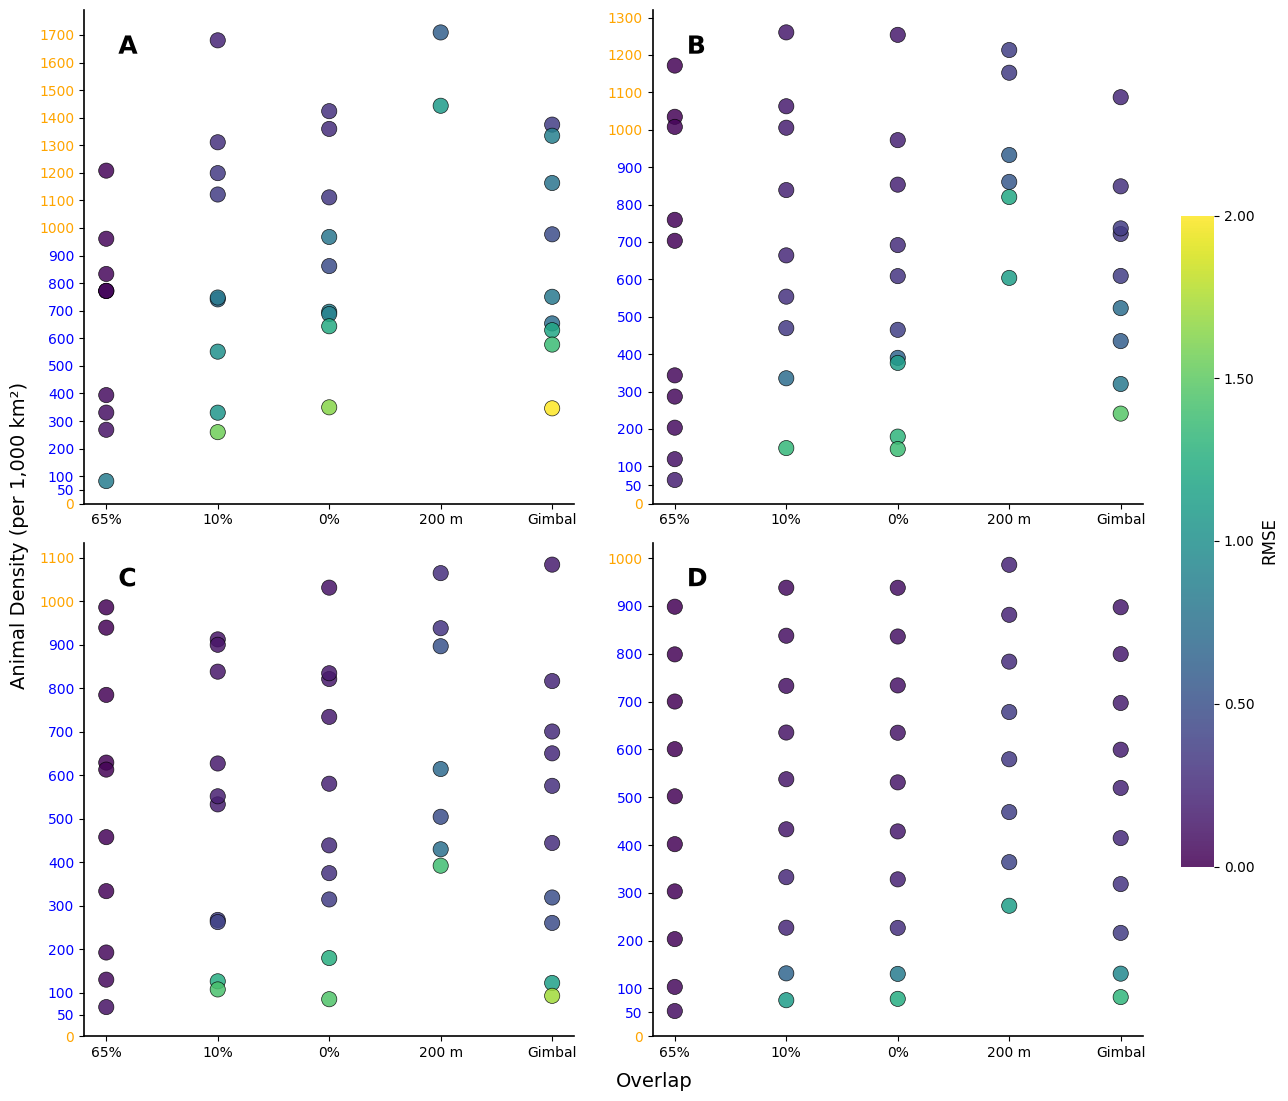

In [103]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import numpy as np
import os

# Sort and extract unique subplot categories
sorted_data = data.sort_values(by='NSubplots')
unique_nsubplots = sorted_data['NSubplots'].unique()[:4]  # First 4 for 2x2 layout

# Label mapping for x-axis
label_mapping = {
    1: '65%',
    2: '10%',
    3: '0%',
    4: '200 m',
    5: 'Gimbal'
}

# Setup figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

# Colormap and color normalization
cmap = plt.get_cmap('viridis')
norm = mpl.colors.Normalize(
    vmin=0,  # Start from 0
    vmax=round(sorted_data['RRMSE'].max(), 0)
)

subplot_labels = ['A', 'B', 'C', 'D']
blue_ticks = [50, 100, 200, 300, 400, 500, 600, 700, 800, 900]

for i, nsub in enumerate(unique_nsubplots):
    ax = axs[i]
    subset = sorted_data[sorted_data['NSubplots'] == nsub]
    subset = subset.sort_values('RRMSE')

    sc = ax.scatter(
        subset['Overlap_cat'],
        subset['Mean_estimated_Density'],
        c=subset['RRMSE'],
        cmap=cmap,
        norm=norm,
        marker='o',
        s=120,
        alpha=0.85,
        edgecolor='k',
        linewidth=0.5
    )

    # Remove grid for cleaner look
    ax.grid(False)

    ax.tick_params(axis='both', which='major', labelsize=10)

    unique_overlap_cats = subset['Overlap_cat'].unique()
    ax.set_xticks(unique_overlap_cats)
    ax.set_xticklabels([label_mapping[cat] for cat in unique_overlap_cats])

    # Adjust y-axis ticks
    y_min, y_max = ax.get_ylim()
    all_ticks = sorted(set(blue_ticks + list(range(0, int(y_max) + 1, 100))))
    ax.set_yticks(all_ticks)

    # Color y-axis tick labels
    for tick in ax.get_yticklabels():
        try:
            tick_value = int(tick.get_text())
            tick.set_color('blue' if tick_value in blue_ticks else 'orange')
        except ValueError:
            tick.set_color('orange')

    # Add subplot label with shadow effect
    label = ax.text(0.07, 0.95, subplot_labels[i], transform=ax.transAxes,
                    fontsize=18, fontweight='bold', va='top', ha='left')
    label.set_path_effects([path_effects.Stroke(linewidth=3, foreground='white'),
                             path_effects.Normal()])

  
# Apply consistent axis styling for all subplots
for ax in axs:
    # Hide top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Style left and bottom spines
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)
 

# Shared axis labels
fig.text(0.5, 0.04, 'Overlap', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Animal Density (per 1,000 km²)', va='center', rotation='vertical', fontsize=14)

# Define specific ticks for the colorbar
max_val = round(sorted_data['RRMSE'].max(), 0)
cbar_ticks = np.linspace(0, max_val, 5)

# Shared colorbar for RRMSE
cbar = fig.colorbar(sc, ax=axs, orientation='vertical', pad=0.1, fraction=0.03, ticks=cbar_ticks)
cbar.set_label('RMSE', fontsize=12)
cbar.ax.tick_params(labelsize=10)
cbar.ax.set_yticklabels([f'{x:.2f}' for x in cbar_ticks])
cbar.outline.set_linewidth(0)  # Remove colorbar border for rounded look


plt.tight_layout(rect=[0.05, 0.05, 0.86, 0.95])
plt.savefig(os.path.join('..', '..', 'Output', 'Plots', 'quadcopterFeasability_plot_2D_Bias_combined.png'), dpi=300)
plt.show()

In [3]:
coverData

,Simulation,Design,Mean_Sampler_Count,Mean_Cover_Area,Mean_Cover_Percentage,Mean_Line_Length,Mean_Trackline_Length,Mean_Cyclic_Trackline_Length,Mean_On_Effort,Mean_Off_Effort,Mean_Return_to_Home,Mean_Off_Effort_Return,On_Effort_Percentage,Off_Effort_Percentage,Return_to_Home_Percentage,Off_Effort_Return_Percentage,Number_of_Plots,Overlap
0,gimbal4,systematic,25.8,1.536371e+07,15.36,51500.0,58242.50,67190.71,51500.0,6742.50,8948.21,15690.71,76.65,10.03,13.32,23.35,4,gimbal
1,gimbal9,systematic,58.2,3.464464e+07,34.64,116420.0,131675.10,151625.91,116420.0,15255.10,19950.81,35205.91,76.78,10.06,13.16,23.22,9,gimbal
2,gimbal16,systematic,103.6,6.162002e+07,61.62,207140.0,234286.70,269697.47,207140.0,27146.70,35410.77,62557.47,76.80,10.07,13.13,23.20,16,gimbal
3,gimba25,systematic,161.8,9.626249e+07,96.26,323560.0,365961.80,421323.38,323560.0,42401.80,55361.58,97763.38,76.80,10.06,13.14,23.20,25,gimbal
4,2004,systematic,40.0,6.337555e+06,6.34,80000.0,87200.00,97962.90,80000.0,7200.00,10762.90,17962.90,81.66,7.35,10.99,18.34,4,200
5,2009,systematic,90.0,1.427240e+07,14.27,180000.0,196200.00,220416.52,180000.0,16200.00,24216.52,40416.52,81.66,7.35,10.99,18.34,9,200
6,20016,systematic,160.0,2.534513e+07,25.35,320000.0,348800.00,391851.60,320000.0,28800.00,43051.60,71851.60,81.66,7.35,10.99,18.34,16,200
7,20025,systematic,250.0,3.959066e+07,39.59,500000.0,545000.00,612268.12,500000.0,45000.00,67268.12,112268.12,81.66,7.35,10.99,18.34,25,200
8,04,systematic,100.0,1.583635e+07,15.84,200000.0,207680.00,215360.00,200000.0,7680.00,7680.00,15360.00,92.87,3.57,3.57,7.13,4,0
9,09,systematic,225.0,3.564378e+07,35.64,450000.0,467280.00,484560.00,450000.0,17280.00,17280.00,34560.00,92.87,3.57,3.57,7.13,9,0


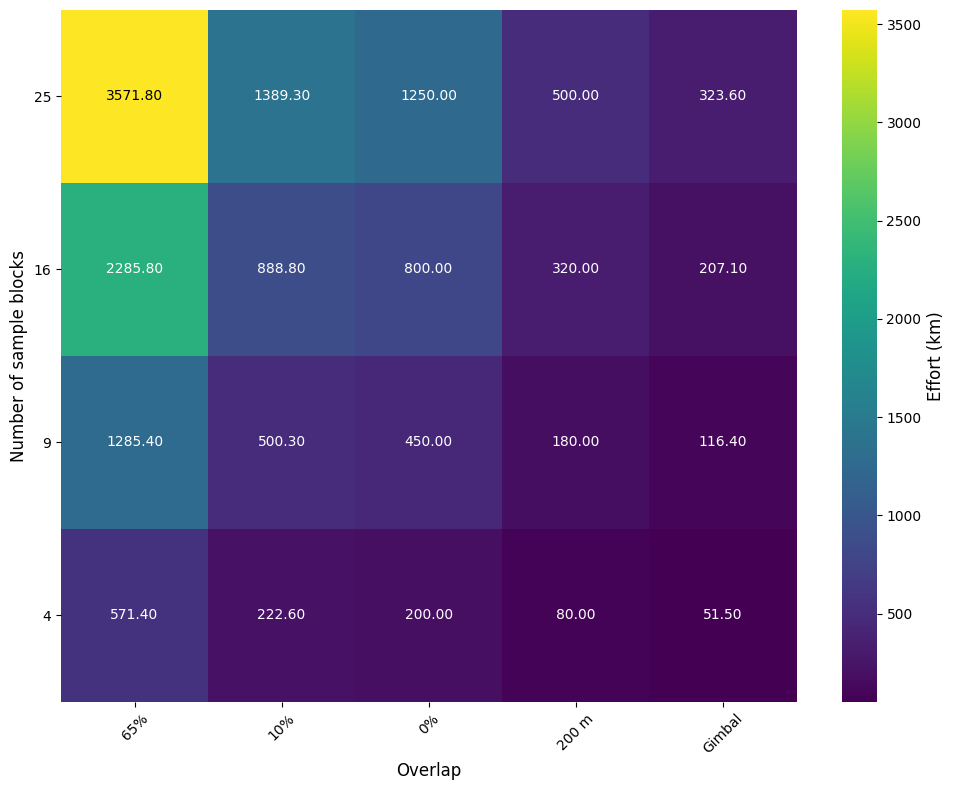

In [85]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import numpy as np

# Create pivot table with CV values divided by 1000
pivot_table = coverData.pivot_table(
    values='Mean_On_Effort',
    index='Number_of_Plots',
    columns='Overlap',
    aggfunc='mean'
) / 1000  # convert effort to KM

# Sort index in descending order to reverse y-axis
pivot_table = pivot_table.sort_index(ascending=False)

# Reorder columns (manually set order)
desired_order = ['65', '10', '0', '200', 'gimbal']
pivot_table = pivot_table[desired_order]

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap with viridis colormap
im = ax.imshow(pivot_table, cmap='viridis', aspect='auto')

# Add colorbar and remove outline for rounded look
cbar = plt.colorbar(im)
cbar.set_label('Effort (km)', fontsize=12)
cbar.outline.set_linewidth(0)  # Remove colorbar border

# Configure axes with custom labels
ax.set_xticks(np.arange(len(desired_order)))
ax.set_yticks(np.arange(len(pivot_table.index)))

# Create custom x-labels
x_labels = ['65%', '10%', '0%', '200 m', 'Gimbal']
ax.set_xticklabels(x_labels)
ax.set_yticklabels(pivot_table.index)

# Remove grid for cleaner look
ax.grid(False)

# Remove unnecessary borders (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Label axes
plt.xlabel('Overlap', fontsize=12)
plt.ylabel('Number of sample blocks', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Function to determine text color based on background brightness
def get_text_color(val, vmin, vmax):
    brightness = (val - vmin) / (vmax - vmin)
    return 'black' if brightness > 0.7 else 'white'

# Add text annotations in each cell with dynamic color
vmin = pivot_table.min().min()
vmax = pivot_table.max().max()

for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        value = round(pivot_table.iloc[i, j], 1)
        text_color = get_text_color(value, vmin, vmax)
        text = ax.text(j, i, f'{value:.2f}',
                       ha='center', va='center',
                       color=text_color)

plt.tight_layout()
plt.show()

/tmp/ipykernel_1454/1214666366.py:119: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_high = ax.scatter(


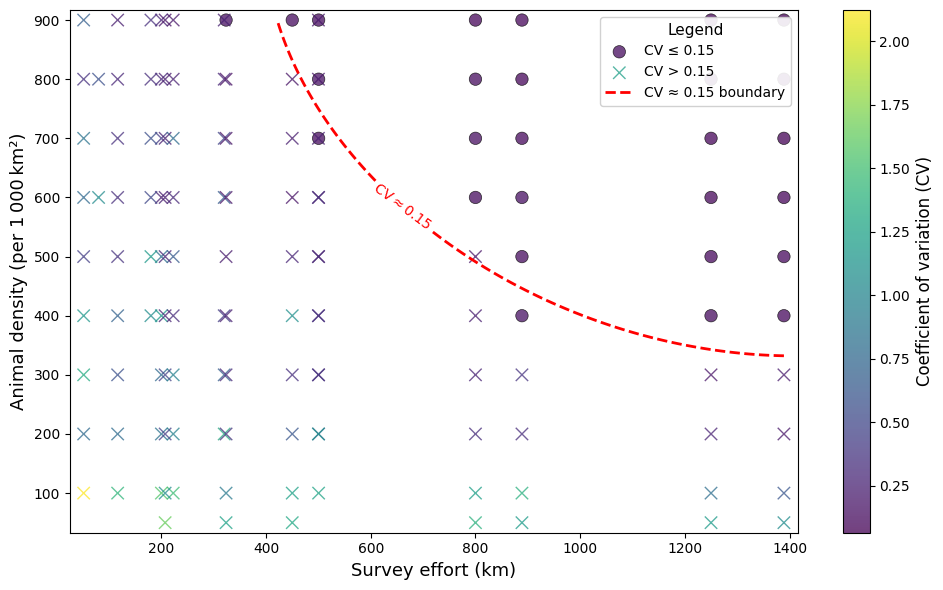

In [17]:
# ----------------------------------------------
# 1️⃣ Load the two CSV files
# -------------------------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Adjust the paths if your folder structure differs
sim_path   = os.path.join('..', '..', 'Output', 'Simulation', 'sumSimQC.csv')
cover_path = os.path.join('..', '..', 'Output', 'Simulation', 'designsQC-comparsiondf.csv')

sim_df   = pd.read_csv(sim_path).dropna()          # contains CV, trueDensity, Overlap, NSubplots …
cover_df = pd.read_csv(cover_path)                # contains Number_of_Plots, Overlap, Mean_On_Effort

# -------------------------------------------------
# 2️⃣ Remove the 65 % overlap design
# -------------------------------------------------
mask_not_65   = ~sim_df['Overlap'].isin([65, '65'])
sim_df       = sim_df[mask_not_65]
mask_not_65_cov  = ~cover_df['Overlap'].isin([65, '65'])
cover_df         = cover_df[mask_not_65_cov]
# mask_not_200   = ~sim_df['Overlap'].isin([200, '200'])
# sim_df       = sim_df[mask_not_200]
# mask_not_200_cov  = ~cover_df['Overlap'].isin([200, '200'])
# cover_df         = cover_df[mask_not_200_cov]
# mask_not_gimbal   = ~sim_df['Overlap'].isin(['gimbal'])
# sim_df       = sim_df[mask_not_gimbal]
# mask_not_gimbal_cov  = ~cover_df['Overlap'].isin(['gimbal'])
# cover_df         = cover_df[mask_not_gimbal_cov]

# -------------------------------------------------
# 3️⃣ Convert effort to kilometres (heat‑map divided by 1000)
# -------------------------------------------------
cover_df['Effort_km'] = cover_df['Mean_On_Effort'] / 1000.0

# --------------------------------------------
# 4️⃣ Merge on Overlap + subplot count
# -----------------------------------------------
merged = pd.merge(
    sim_df,
    cover_df,
   left_on  = ['Overlap', 'NSubplots'],
    right_on = ['Overlap', 'Number_of_Plots'],
    how='inner'
)

abundance_to_inputDensity = {
    5:  50, 10: 100, 20: 200, 30: 300, 40: 400,
    50: 500, 60: 600, 70: 700, 80: 800, 90: 900
}
merged['InputDensity'] = (
    merged['Abundance']
          .map(abundance_to_inputDensity)
          .fillna(-1)
          .astype(int)
)


# ------------------------------------------------
# 5️⃣ Create binary target at the 0.15 CV threshold
# -----------------------------------------------
merged['high_cv'] = (merged['CV'] > 0.15).astype(int)

# -------------------------------------------------
# 6️⃣ Split data for visualisation
# -------------------------------------------------
low_cv = merged[merged['high_cv'] == 0]
high_cv = merged[merged['high_cv'] == 1]

# -------------------------------------------------
# 7️⃣ Fit logistic model with quadratic interaction
# -------------------------------------------------
X = merged[['Effort_km', 'InputDensity']].values
y = merged['high_cv'].values

model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LogisticRegression(solver='lbfgs', max_iter=1000)
)
model.fit(X, y)

# -----------------------------------------------
# 8️⃣ Build a grid for contour plotting
# -------------------------------------------------
# Define the range slightly beyond the observed data
effort_min, effort_max = merged['Effort_km'].min(), merged['Effort_km'].max()
density_min, density_max = merged['InputDensity'].min(), merged['InputDensity'].max()

# Grid resolution (increase for smoother contours)
grid_res = 200
E, D = np.meshgrid(
    np.linspace(effort_min, effort_max, grid_res),
    np.linspace(density_min, density_max, grid_res)
)

grid_points = np.column_stack([E.ravel(), D.ravel()])
prob = model.predict_proba(grid_points)[:, 1]          # probability of high_cv = 1
prob_grid = prob.reshape(E.shape)

# -------------------------------------------------
# 9️⃣ Plot scatter + the 0.5‑probability contour (CV ≈ 0.15 boundary)
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))

# Normalise colour scale for CV values
norm = plt.Normalize(vmin=merged['CV'].min(), vmax=merged['CV'].max())

# Scatter layers (store handles for the legend)
sc_low = ax.scatter(
    low_cv['Effort_km'], low_cv['InputDensity'],
    c=low_cv['CV'], cmap='viridis', norm=norm,
    marker='o', s=80, edgecolor='k', linewidth=0.5, alpha=0.75
)
sc_high = ax.scatter(
    high_cv['Effort_km'], high_cv['InputDensity'],
    c=high_cv['CV'], cmap='viridis', norm=norm,
    marker='x', s=80, edgecolor='k', linewidth=1.0, alpha=0.75
)

# Decision boundary at probability = 0.5
cont = ax.contour(E, D, prob_grid, levels=[0.5],
                  colors='red', linewidths=2, linestyles='--')
ax.clabel(cont, fmt='CV ≈ 0.15', fontsize=10, colors='red')

# Proxy line for legend (contour objects have no direct handle)
red_line_proxy = Line2D([0], [0], color='red', lw=2,
                        ls='--', label='CV ≈ 0.15 boundary')

# Assemble legend
legend_handles = [sc_low, sc_high, red_line_proxy]
legend_labels  = ['CV ≤ 0.15', 'CV > 0.15', 'CV ≈ 0.15 boundary']
ax.legend(handles=legend_handles, labels=legend_labels,
          loc='upper right', fontsize=10,
          title='Legend', title_fontsize=11, framealpha=0.9)

# Small buffer so nothing is clipped at the edges
extra_buffer = 0.02
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_xlim(x0 - extra_buffer*(x1 - x0), x1 + extra_buffer*(x1 - x0))
ax.set_ylim(y0 - extra_buffer*(y1 - y0), y1 + extra_buffer*(y1 - y0))

# Axis labels and colour bar
ax.set_xlabel('Survey effort (km)', fontsize=13)
ax.set_ylabel('Animal density (per 1 000 km²)', fontsize=13)
cbar = fig.colorbar(sc_low, ax=ax, orientation='vertical')
cbar.set_label('Coefficient of variation (CV)', fontsize=12)

plt.tight_layout()
plt.show()

mask_not_65   = ~sim_df['Overlap'].isin([65, '65'])
sim_df       = sim_df[mask_not_65]
mask_not_65_cov  = ~cover_df['Overlap'].isin([65, '65'])
cover_df         = cover_df[mask_not_65_cov]
mask_not_200   = ~sim_df['Overlap'].isin([200, '200'])
sim_df       = sim_df[mask_not_200]
mask_not_200_cov  = ~cover_df['Overlap'].isin([200, '200'])
cover_df         = cover_df[mask_not_200_cov]

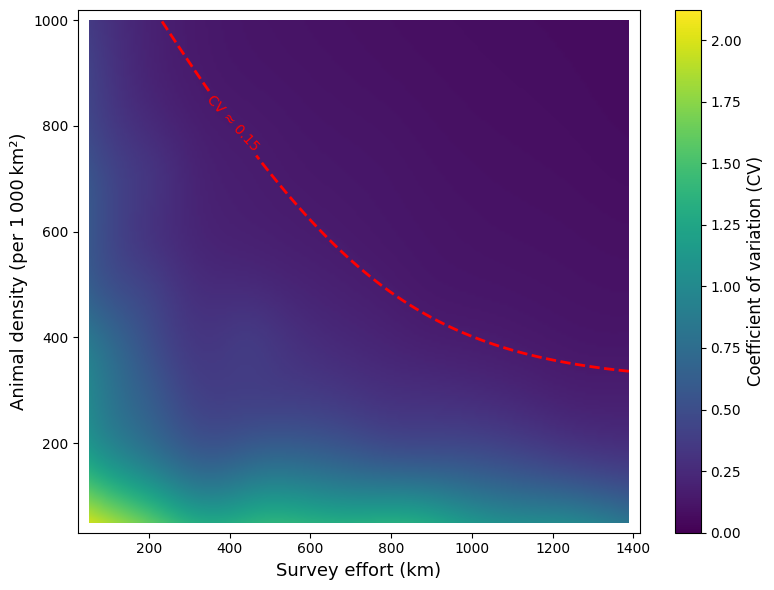

In [ ]:
# ----------------------------------------------
# 1️⃣ Load the two CSV files
# -------------------------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import Rbf

# Adjust the paths if your folder structure differs
sim_path   = os.path.join('..', '..', 'Output', 'Simulation', 'sumSimQC.csv')
cover_path = os.path.join('..', '..', 'Output', 'Simulation', 'designsQC-comparsiondf.csv')

sim_df   = pd.read_csv(sim_path).dropna()          # contains CV, trueDensity, Overlap, NSubplots …
cover_df = pd.read_csv(cover_path)                # contains Number_of_Plots, Overlap, Mean_On_Effort

# -------------------------------------------------
# 2️⃣ Remove the 65 % overlap design
# -------------------------------------------------
mask_not_65   = ~sim_df['Overlap'].isin([65, '65'])
sim_df       = sim_df[mask_not_65]
mask_not_65_cov  = ~cover_df['Overlap'].isin([65, '65'])
cover_df         = cover_df[mask_not_65_cov]
mask_not_200   = ~sim_df['Overlap'].isin([200, '200'])
sim_df       = sim_df[mask_not_200]
mask_not_200_cov  = ~cover_df['Overlap'].isin([200, '200'])
cover_df         = cover_df[mask_not_200_cov]

# -------------------------------------------------
# 3️⃣ Convert effort to kilometres (heat‑map divided by 1000)
# -------------------------------------------------
cover_df['Effort_km'] = cover_df['Mean_On_Effort'] / 1000.0

# --------------------------------------------
# 4️⃣ Merge on Overlap + subplot count
# -----------------------------------------------
merged = pd.merge(
    sim_df,
    cover_df,
    left_on  = ['Overlap', 'NSubplots'],
    right_on = ['Overlap', 'Number_of_Plots'],
    how='inner'
)

abundance_to_inputDensity = {
    5:  50, 10: 100, 20: 200, 30: 300, 40: 400,
    50: 500, 60: 600, 70: 700, 80: 800, 90: 900
}
merged['InputDensity'] = (
    merged['Abundance']
          .map(abundance_to_inputDensity)
          .fillna(-1)
          .astype(int)
)

# ------------------------------------------------
# 5️⃣ Create binary target at the 0.15 CV threshold
# -----------------------------------------------
merged['high_cv'] = (merged['CV'] > 0.15).astype(int)

# -------------------------------------------------
# 7️⃣ Fit logistic model with quadratic interaction
# -------------------------------------------------
X = merged[['Effort_km', 'InputDensity']].values
y = merged['high_cv'].values

model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LogisticRegression(solver='lbfgs', max_iter=1000)
)
model.fit(X, y)

# -----------------------------------------------
# 8️⃣ Build a grid for contour plotting
# -------------------------------------------------
effort_min, effort_max = merged['Effort_km'].min(), merged['Effort_km'].max()
density_min, density_max = merged['InputDensity'].min(), 1000

grid_res = 200
E, D = np.meshgrid(
    np.linspace(effort_min, effort_max, grid_res),
    np.linspace(density_min, density_max, grid_res)
)

grid_points = np.column_stack([E.ravel(), D.ravel()])
prob = model.predict_proba(grid_points)[:, 1]          # probability of high_cv = 1
prob_grid = prob.reshape(E.shape)

# -------------------------------------------------
# 9️⃣ Logarithmic RBF interpolation for CV shading
# -------------------------------------------------
points = merged[['Effort_km', 'InputDensity']].values
cv_values = merged['CV'].values

# Apply log transform to CV values
log_cv_values = np.log(cv_values)

# RBF interpolation on log scale (increase smooth for more smoothing)
rbf = Rbf(points[:, 0], points[:, 1], log_cv_values, function='multiquadric', smooth=1.0)

# Evaluate and exponentiate back
log_cv_grid = rbf(E, D)
cv_grid = np.exp(log_cv_grid)

# -------------------------------------------------
# 🔟 Plot CV shading + logistic contour
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Shaded CV map
norm = plt.Normalize(vmin=0, vmax=merged['CV'].max())

shading = ax.imshow(cv_grid, extent=(effort_min, effort_max, density_min, density_max),
                    origin='lower', cmap='viridis', norm=norm, aspect='auto', interpolation='bilinear')

# Decision boundary (probability = 0.5)
cont = ax.contour(E, D, prob_grid, levels=[0.5],
                  colors='red', linewidths=2, linestyles='--')
ax.clabel(cont, fmt='CV ≈ 0.15', fontsize=10, colors='red')

# Colorbar for CV
cbar = fig.colorbar(shading, ax=ax, orientation='vertical')
cbar.set_label('Coefficient of variation (CV)', fontsize=12)

# Axis labels
ax.set_xlabel('Survey effort (km)', fontsize=13)
ax.set_ylabel('Animal density (per 1 000 km²)', fontsize=13)

# Add buffer
extra_buffer = 0.02
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_xlim(x0 - extra_buffer*(x1 - x0), x1 + extra_buffer*(x1 - x0))
ax.set_ylim(y0 - extra_buffer*(y1 - y0), y1 + extra_buffer*(y1 - y0))

plt.tight_layout()
plt.show()

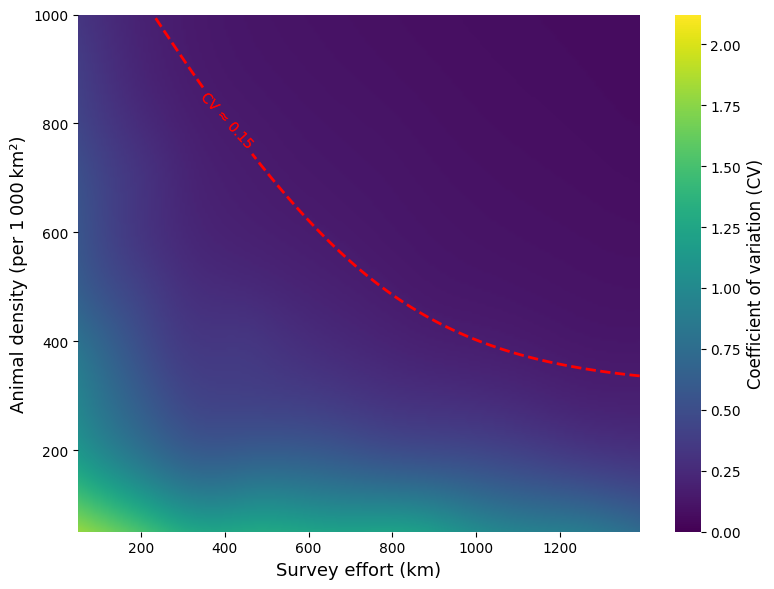

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import Rbf

# ----------------------------------------------
# 1️⃣ Load the two CSV files
# -------------------------------------------------
sim_path   = os.path.join('..', '..', 'Output', 'Simulation', 'sumSimQC.csv')
cover_path = os.path.join('..', '..', 'Output', 'Simulation', 'designsQC-comparsiondf.csv')

sim_df   = pd.read_csv(sim_path).dropna()
cover_df = pd.read_csv(cover_path)

# -------------------------------------------------
# 2️⃣ Remove unwanted designs
# -------------------------------------------------
mask_not_65   = ~sim_df['Overlap'].isin([65, '65'])
sim_df       = sim_df[mask_not_65]
mask_not_65_cov  = ~cover_df['Overlap'].isin([65, '65'])
cover_df         = cover_df[mask_not_65_cov]

mask_not_200   = ~sim_df['Overlap'].isin([200, '200'])
sim_df       = sim_df[mask_not_200]
mask_not_200_cov  = ~cover_df['Overlap'].isin([200, '200'])
cover_df         = cover_df[mask_not_200_cov]

# -------------------------------------------------
# 3️⃣ Convert effort to kilometres
# -------------------------------------------------
cover_df['Effort_km'] = cover_df['Mean_On_Effort'] / 1000.0

# --------------------------------------------
# 4️⃣ Merge on Overlap + subplot count
# -----------------------------------------------
merged = pd.merge(
    sim_df,
    cover_df,
    left_on  = ['Overlap', 'NSubplots'],
    right_on = ['Overlap', 'Number_of_Plots'],
    how='inner'
)

abundance_to_inputDensity = {
    5:  50, 10: 100, 20: 200, 30: 300, 40: 400,
    50: 500, 60: 600, 70: 700, 80: 800, 90: 900
}
merged['InputDensity'] = (
    merged['Abundance']
          .map(abundance_to_inputDensity)
          .fillna(-1)
          .astype(int)
)

# ------------------------------------------------
# 5️⃣ Create binary target at the 0.15 CV threshold
# -----------------------------------------------
merged['high_cv'] = (merged['CV'] > 0.15).astype(int)

# -------------------------------------------------
# 6️⃣ Fit logistic model
# -------------------------------------------------
X = merged[['Effort_km', 'InputDensity']].values
y = merged['high_cv'].values

model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LogisticRegression(solver='lbfgs', max_iter=1000)
)
model.fit(X, y)

# -----------------------------------------------
# 7️⃣ Build grid for plotting
# -------------------------------------------------
effort_min, effort_max = merged['Effort_km'].min(), merged['Effort_km'].max()
density_min, density_max = merged['InputDensity'].min(), 1000

grid_res = 200
E, D = np.meshgrid(
    np.linspace(effort_min, effort_max, grid_res),
    np.linspace(density_min, density_max, grid_res)
)

grid_points = np.column_stack([E.ravel(), D.ravel()])
prob = model.predict_proba(grid_points)[:, 1]
prob_grid = prob.reshape(E.shape)

# -------------------------------------------------
# 8️⃣ Logarithmic RBF interpolation for CV shading
# -------------------------------------------------
points = merged[['Effort_km', 'InputDensity']].values
cv_values = merged['CV'].values

log_cv_values = np.log(cv_values)
rbf = Rbf(points[:, 0], points[:, 1], log_cv_values, function='multiquadric', smooth=2.0)
log_cv_grid = rbf(E, D)
cv_grid = np.exp(log_cv_grid)

# -------------------------------------------------
# 9️⃣ Plot with requested changes only
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Smooth shading using imshow (same as before)
norm = plt.Normalize(vmin=0, vmax=merged['CV'].max())
shading = ax.imshow(cv_grid, extent=(effort_min, effort_max, density_min, density_max),
                    origin='lower', cmap='viridis', norm=norm, aspect='auto', interpolation='bilinear')

# Decision boundary with shadowed label
cont = ax.contour(E, D, prob_grid, levels=[0.5], colors='red', linewidths=2, linestyles='--')
for txt in ax.clabel(cont, fmt='CV ≈ 0.15', fontsize=10, colors='red'):
    txt.set_path_effects([path_effects.Stroke(linewidth=0, foreground='white'),
                          path_effects.Normal()])

# Colorbar styling (remove border for rounded look)
cbar = fig.colorbar(shading, ax=ax, orientation='vertical')
cbar.set_label('Coefficient of variation (CV)', fontsize=12)
cbar.outline.set_linewidth(0)  # Remove colorbar border

# Axis labels (unchanged)
ax.set_xlabel('Survey effort (km)', fontsize=13)
ax.set_ylabel('Animal density (per 1 000 km²)', fontsize=13)

# Remove unnecessary borders (axes spines)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

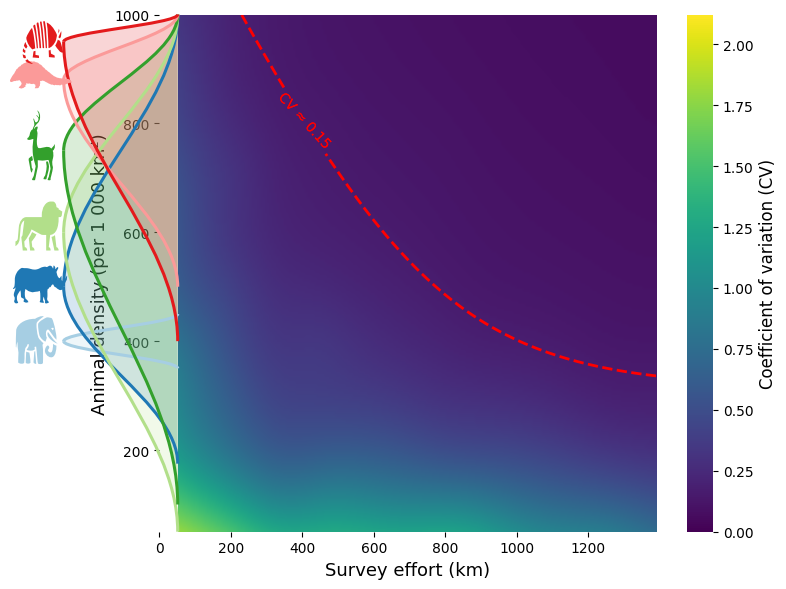

In [ ]:
import os
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.transforms import Affine2D
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import Rbf
from svgpath2mpl import parse_path

# -----------------------------
# SVG parsing and Bézier utilities
# -----------------------------
def parse_svg_paths(svg_file):
    paths = []
    tree = ET.parse(svg_file)
    root = tree.getroot()
    ns = {"svg": "http://www.w3.org/2000/svg"}
    for elem in root.findall(".//svg:path", ns) + root.findall(".//path"):
        d = elem.attrib.get("d")
        if d:
            try:
                paths.append(parse_path(d))
            except Exception as exc:
                print(f"Warning: could not parse path in {svg_file}: {exc}")
    return paths

def merge_paths(paths):
    verts_all, codes_all = [], []
    for p in paths:
        verts_all.extend(p.vertices)
        codes_all.extend(p.codes)
    return Path(verts_all, codes_all)

def make_cubic_bezier_path(p0, p1, c1, c2):
    verts = [p0, c1, c2, p1]
    codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]
    return Path(verts, codes)

def create_s_shape_controls(p0, p1, dx=0.15, dy_frac=0.35):
    x0, y0 = p0
    x1, y1 = p1
    dy = y1 - y0
    c1 = (x0 + dx, y0 + dy * dy_frac)
    c2 = (x1 - dx, y1 - dy * dy_frac)
    return c1, c2

def add_svg_icon(ax,
                 center_xy,
                 svg_path_d=None,
                 svg_file=None,
                 scale=None,
                 facecolor="tab:orange",
                 target_height=None):
    """
    Add an SVG icon centered at data coords.

    Parameters
    ----------
    center_xy : tuple
        (x, y) center in data coordinates.
    svg_path_d, svg_file : str
        Either provide a path string or a file path.
    scale : float or None
        Legacy constant scale (data-units per SVG unit). If target_height is
        provided, 'scale' is ignored and computed automatically.
    target_height : float or None
        Desired icon height in data coordinates. If provided, this function
        rescales the parsed path so its vertical extent equals target_height.
    """
    # Parse SVG into a single Path
    if svg_file:
        subpaths = parse_svg_paths(svg_file)
        icon_path = merge_paths(subpaths) if subpaths else parse_path(svg_path_d)
    else:
        icon_path = parse_path(svg_path_d)

    # Compute the raw (SVG space) bounding box BEFORE any transform
    verts = icon_path.vertices
    xmin, ymin = verts[:, 0].min(), verts[:, 1].min()
    xmax, ymax = verts[:, 0].max(), verts[:, 1].max()
    svg_height = max(1e-12, ymax - ymin)  # avoid division by zero

    # Center around its centroid
    centroid = verts.mean(axis=0)
    trans = Affine2D().translate(-centroid[0], -centroid[1])

    # Determine scale:
    # - If target_height provided => scale_y = target_height / svg_height
    # - Else => fallback to given 'scale' or a default (e.g., 0.18)
    if target_height is not None:
        scale_y = target_height / svg_height
        scale_x = scale_y  # preserve aspect ratio
    else:
        scale_y = scale if scale is not None else 0.18
        scale_x = scale_y

    # Flip vertically (SVG y-down to Matplotlib y-up), then scale, then translate
    trans = trans.scale(scale_x, -scale_y).translate(center_xy[0], center_xy[1])

    # Apply transform and draw
    icon_path = trans.transform_path(icon_path)
    patch = PathPatch(icon_path, facecolor=facecolor, edgecolor="none", zorder=5, clip_on=False)
    ax.add_patch(patch)


# -----------------------------
# Bézier shading
# -----------------------------
def sample_cubic_bezier(p0, c1, c2, p1, n=300):
    t = np.linspace(0.0, 1.0, n)
    b0 = (1 - t) ** 3
    b1 = 3 * (1 - t) ** 2 * t
    b2 = 3 * (1 - t) * t ** 2
    b3 = t ** 3
    x = b0 * p0[0] + b1 * c1[0] + b2 * c2[0] + b3 * p1[0]
    y = b0 * p0[1] + b1 * c1[1] + b2 * c2[1] + b3 * p1[1]
    return x, y

def shade_between_beziers_by_sampling(ax,
                                      p0_upper, c1_upper, c2_upper, p1_upper,
                                      p0_lower, c1_lower, c2_lower, p1_lower,
                                      color="0.7", alpha=0.25, n=400, zorder=3):
    xu, yu = sample_cubic_bezier(p0_upper, c1_upper, c2_upper, p1_upper, n=n)
    xl, yl = sample_cubic_bezier(p0_lower, c1_lower, c2_lower, p1_lower, n=n)
    verts = [(x, y) for x, y in zip(xu, yu)] + [(x, y) for x, y in zip(xl[::-1], yl[::-1])]
    verts.append(verts[0])
    codes = [Path.MOVETO] + [Path.LINETO] * (len(verts) - 2) + [Path.CLOSEPOLY]
    poly = Path(verts, codes)
    ax.add_patch(PathPatch(poly, facecolor=color, edgecolor="none", alpha=alpha, zorder=zorder, clip_on=False))

# -----------------------------
# Layout helper
# -----------------------------
def auto_layout_icons(icon_specs, min_vertical_gap=50.0, scale_base=0.20, scale_min=0.15):
    for spec in icon_specs:
        if 'icon_density' in spec and spec['icon_density'] is not None:
            spec['icon_y'] = float(spec['icon_density'])
        else:
            spec['icon_y'] = (float(spec['ymin']) + float(spec['ymax'])) / 2.0
        spec['scale'] = scale_base

    specs_sorted = sorted(icon_specs, key=lambda s: s['icon_y'])
    for i in range(1, len(specs_sorted)):
        prev = specs_sorted[i - 1]
        curr = specs_sorted[i]
        if curr['icon_y'] - prev['icon_y'] < min_vertical_gap:
            curr['icon_y'] = prev['icon_y'] + min_vertical_gap

    centers = [s['icon_y'] for s in specs_sorted]
    gaps = np.diff(centers) if len(centers) > 1 else np.array([min_vertical_gap])
    gap_med = float(np.median(gaps))
    scale_factor = max(scale_min / scale_base, min(1.0, gap_med / (min_vertical_gap * 1.5)))
    for s in specs_sorted:
        s['scale'] = scale_base * scale_factor

    return specs_sorted

# -----------------------------
# Add icon + connectors
# -----------------------------

def add_icon_with_connectors(ax, icon_x, ymin, ymax, icon_y, scale,
                              svg_path_d=None, svg_file=None,
                              icon_color="tab:orange", dx=0.12, dy_frac=0.35,
                              x_axis_target=None, icon_shift=0.08,
                              icon_height=None):
    """
    icon_height: desired icon height in data units (overrides 'scale').
    """
    if x_axis_target is None:
        x_axis_target = max(0.0, ax.get_xlim()[0])

    # Curve anchor stays near the axis
    p0 = (icon_x, icon_y)
    p1_upper = (x_axis_target, float(ymax))
    p1_lower = (x_axis_target, float(ymin))

    # Icon center shifted left of anchor
    icon_center = (icon_x - icon_shift, icon_y)

    # Draw SVG with target height normalization
    add_svg_icon(ax,
                 center_xy=icon_center,
                 svg_path_d=svg_path_d,
                 svg_file=svg_file,
                 scale=scale,                # ignored if icon_height is provided
                 facecolor=icon_color,
                 target_height=icon_height)  # normalize heights

    # Controls, shading, and curve lines unchanged…
    c1_u, c2_u = create_s_shape_controls(p0, p1_upper, dx=dx, dy_frac=dy_frac)
    c1_l, c2_l = create_s_shape_controls(p0, p1_lower, dx=dx, dy_frac=dy_frac)

    shade_between_beziers_by_sampling(ax, p0, c1_u, c2_u, p1_upper,
                                      p0, c1_l, c2_l, p1_lower,
                                      color=icon_color, alpha=0.18)

    upper_path = make_cubic_bezier_path(p0, p1_upper, c1_u, c2_u)
    lower_path = make_cubic_bezier_path(p0, p1_lower, c1_l, c2_l)

    ax.add_patch(PathPatch(upper_path, facecolor="none", edgecolor=icon_color,
                           lw=2.2, zorder=4, clip_on=False))
    ax.add_patch(PathPatch(lower_path, facecolor="none", edgecolor=icon_color,
                           lw=2.2, zorder=4, clip_on=False))

# -----------------------------
# Data processing
# -----------------------------
sim_path   = os.path.join('..', '..', 'Output', 'Simulation', 'sumSimQC.csv')
cover_path = os.path.join('..', '..', 'Output', 'Simulation', 'designsQC-comparsiondf.csv')

sim_df   = pd.read_csv(sim_path).dropna()
cover_df = pd.read_csv(cover_path)

mask_not_65   = ~sim_df['Overlap'].isin([65, '65'])
sim_df        = sim_df[mask_not_65]
mask_not_65_cov  = ~cover_df['Overlap'].isin([65, '65'])
cover_df         = cover_df[mask_not_65_cov]

mask_not_200   = ~sim_df['Overlap'].isin([200, '200'])
sim_df        = sim_df[mask_not_200]
mask_not_200_cov  = ~cover_df['Overlap'].isin([200, '200'])
cover_df         = cover_df[mask_not_200_cov]

cover_df['Effort_km'] = cover_df['Mean_On_Effort'] / 1000.0

merged = pd.merge(sim_df, cover_df, left_on=['Overlap', 'NSubplots'], right_on=['Overlap', 'Number_of_Plots'], how='inner')

abundance_to_inputDensity = {5:50,10:100,20:200,30:300,40:400,50:500,60:600,70:700,80:800,90:900}
merged['InputDensity'] = merged['Abundance'].map(abundance_to_inputDensity).fillna(-1).astype(int)
merged['high_cv'] = (merged['CV'] > 0.15).astype(int)

X = merged[['Effort_km', 'InputDensity']].values
y = merged['high_cv'].values
model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LogisticRegression(solver='lbfgs', max_iter=1000))
model.fit(X, y)

effort_min, effort_max = merged['Effort_km'].min(), merged['Effort_km'].max()
density_min, density_max = merged['InputDensity'].min(), 1000

grid_res = 200
E, D = np.meshgrid(np.linspace(effort_min, effort_max, grid_res), np.linspace(density_min, density_max, grid_res))
grid_points = np.column_stack([E.ravel(), D.ravel()])
prob = model.predict_proba(grid_points)[:, 1]
prob_grid = prob.reshape(E.shape)

points = merged[['Effort_km', 'InputDensity']].values
cv_values = merged['CV'].values
log_cv_values = np.log(cv_values)
rbf = Rbf(points[:, 0], points[:, 1], log_cv_values, function='multiquadric', smooth=2.0)
log_cv_grid = rbf(E, D)
cv_grid = np.exp(log_cv_grid)

# -----------------------------
# Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(8, 6))
norm = plt.Normalize(vmin=0, vmax=merged['CV'].max())
bg = ax.imshow(cv_grid, extent=(effort_min, effort_max, density_min, density_max),
               origin='lower', cmap='viridis', norm=norm, aspect='auto', interpolation='bilinear')

cont = ax.contour(E, D, prob_grid, levels=[0.5], colors='red', linewidths=2, linestyles='--', zorder=2)
for txt in ax.clabel(cont, fmt='CV ≈ 0.15', fontsize=10, colors='red'):
    txt.set_path_effects([path_effects.Stroke(linewidth=0, foreground='white'), path_effects.Normal()])

cbar = fig.colorbar(bg, ax=ax, orientation='vertical')
cbar.set_label('Coefficient of variation (CV)', fontsize=12)
cbar.outline.set_linewidth(0)

ax.set_xlabel('Survey effort (km)', fontsize=13)
ax.set_ylabel('Animal density (per 1 000 km²)', fontsize=13)
for spine in ax.spines.values():
    spine.set_visible(False)

# -----------------------------
# Icons aligned vertically
# -----------------------------
icon_specs = [
    {"svg_file": "../../Output/svg/elephant-svgrepo-com.svg", "ymin": 350, "ymax": 450, "icon_density": 400, "color": "#a6cee3", "icon_height": 90},
    {"svg_file": "../../Output/svg/rhino-side-view-silhouette-svgrepo-com.svg", "ymin": 175, "ymax": 1000, "icon_density": 500, "color": "#1f78b4", "icon_height": 70},
    {"svg_file": "../../Output/svg/lion-wild-animal-cat-svgrepo-com.svg", "ymin": density_min, "ymax": 1000, "icon_density": 600, "color": "#b2df8a", "icon_height": 90},
    {"svg_file": "../../Output/svg/deer-4-svgrepo-com.svg", "ymin": 100, "ymax": 1000, "icon_density": 750, "color": "#33a02c", "icon_height": 130},
    {"svg_file": "../../Output/svg/pangolin-black-outline.svg", "ymin": 500, "ymax": 1000, "icon_density": 880, "color": "#fb9a99", "icon_height": 50},
    {"svg_file": "../../Output/svg/armadillo-svgrepo-com.svg", "ymin": 400, "ymax": 1000, "icon_density": 950, "color": "#e31a1c", "icon_height": 80}
]

ax.set_xlim(0, effort_max)
icon_x_base = 0 - 0.2 * (effort_max - effort_min)  # curve anchor near axis
icon_shift_global = 0.05 * (effort_max - effort_min)  # move icons left of anchor

icon_specs = auto_layout_icons(icon_specs, min_vertical_gap=40.0, scale_base=0.18, scale_min=0.12)

for spec in icon_specs:
    svg_path = spec.get("svg_file")
    if svg_path and not os.path.exists(svg_path):
        print(f"Missing file: {svg_path}")
        continue

    icon_x = icon_x_base  # all icons aligned vertically

    add_icon_with_connectors(
            ax=ax,
            icon_x=icon_x,
            ymin=spec["ymin"],
            ymax=spec["ymax"],
            icon_y=spec["icon_y"],
            scale=spec["scale"],           # used only if icon_height is None
            svg_file=svg_path,
            icon_color=spec["color"],
            dx=0.12,
            dy_frac=0.35,
            x_axis_target=effort_min,
            icon_shift=icon_shift_global,
            icon_height=spec.get("icon_height", None)  # normalize per icon
        )



plt.tight_layout()
plt.show()
